# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [1]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [5]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [17]:
# Your code here:
fifa['ValueNumeric'] = fifa['Value'].str.replace(r"[^\d*\.?\d*$]",'')
fifa['ValueNumeric'] = fifa['ValueNumeric'].astype("float")
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [33]:
# Your code here:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("ValueNumeric ~ C(fifa['Preferred Foot']) + C(Position)", data=fifa).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(fifa['Preferred Foot']),7.292211e+04,1.0,0.871795,3.504713e-01
C(Position),8.767522e+06,26.0,4.031426,2.192419e-11
Residual,1.515581e+09,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

# Your conclusions here:

El contraste de hipótesis que estamos examinando es:

${H}_{0}: {\mu}{1}={\mu}{2}=...={\mu}{k}$

${H}_{1}: Por\ lo\ menos\ una\ media\ es\ distinta$

Tenemos que para Position la p=2.192419e-11. Este valor es muy pequeño, indudablemente inferior a 0,05. Por lo tanto, rechazamos la hipótesis nula y concluimos que el valor del jugador difiere según la posición.

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [35]:
# Your code here:
model = ols("ValueNumeric ~ C(Nationality)", data=fifa).fit()

anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(Nationality),4.292914e+07,163.0,3.202987,1.976253e-38
Residual,1.483605e+09,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

**p=1.976253e-38 es mucho más pequeño que 0,05. Rechazamos la hipótesis nula, por lo que podemos asegurar que el valor del jugador varía en función de la nacionalidad.**

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [36]:
# Your code here:
fifa.isnull().sum()

Name                0
Age                 0
Nationality         0
Overall             0
Potential           0
Club              241
Value               0
Preferred Foot     48
Position           60
Weak Foot          48
Acceleration       48
SprintSpeed        48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
ValueNumeric        0
dtype: int64

In [37]:
fifa.dropna(inplace=True)
fifa.isnull().sum()

Name              0
Age               0
Nationality       0
Overall           0
Potential         0
Club              0
Value             0
Preferred Foot    0
Position          0
Weak Foot         0
Acceleration      0
SprintSpeed       0
Stamina           0
Strength          0
LongShots         0
Aggression        0
Interceptions     0
Positioning       0
Vision            0
Penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [39]:
# Your code here:
X = sm.add_constant(fifa[['Stamina','SprintSpeed']]) # We must add the intercept using the add_constant function
X.head()

,const,Stamina,SprintSpeed
0,1.0,72.0,86.0
1,1.0,88.0,91.0
2,1.0,81.0,90.0
3,1.0,43.0,58.0
4,1.0,90.0,76.0


In [41]:
y = fifa['ValueNumeric']
y.head()

0    110.5
1     77.0
2    118.5
3     72.0
4    102.0
Name: ValueNumeric, dtype: float64

In [42]:
model = sm.OLS(y, X).fit()
model

In [43]:
predictions = model.predict(X) 
predictions.head()

0    270.582744
1    263.898502
2    267.201214
3    276.664138
4    258.084594
dtype: float64

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.454
Date:                Tue, 01 Oct 2019   Prob (F-statistic):             0.0116
Time:                        23:51:06   Log-Likelihood:            -1.2702e+05
No. Observations:               17918   AIC:                         2.540e+05
Df Residuals:                   17915   BIC:                         2.541e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         280.4297     10.390     26.991      0.000     260.065     300.795
Stamina        -0.5173      0.174     -2.978      0.003      -0.858      -0.177
SprintSpeed     0.3186      0.188      1.693      0.091      -0.050       0.688
==============================================================================
Omnibus:                     2098.571   Durbin-Watson:                   0.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2259.025
Skew:                           0.819   Prob(JB):                         0.00
Kurtosis:                       2.413   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

# Your conclusions here:

Prob (F-statistic):	0.0116 <= 0,05, rechazamos el modelo, ya que las variables independientes (Stamina y SprintSpeed) no pueden explicar la variable dependiente (valor del jugador).

En concreto, si miramos los resultados para cada una de las variables independientes, vemos que:
* Stamina -> pvalue = 0.003 <= 0,05   --> Esta variable no nos sirve para nuestro modelo.
* SprintSpeed -> pvalue = 0.091 > 0,05   --> Esta variable sí sirve para nuestro modelo.

Por otro lado, R2 es el grado de relación:
* Si R2 = 0 -> X no explica Y (es una nube dispersa)
* Si R2 = 1 -> La nube de puntos es igual a la recta (los puntos se encuentran en la recta)

En nuestro caso, R2 = 0, por lo que, como decíamos antes, rechazamos el modelo.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [46]:
# Your code here:
X = sm.add_constant(fifa[['Potential']]) # We must add the intercept using the add_constant function
y = fifa['ValueNumeric']
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     1054.
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          9.15e-225
Time:                        00:08:47   Log-Likelihood:            -1.2651e+05
No. Observations:               17918   AIC:                         2.530e+05
Df Residuals:                   17916   BIC:                         2.530e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1062.4312     24.547     43.281      0.000    1014.316    1110.546
Potential    -11.1326      0.343    -32.469      0.000     -11.805     -10.461
==============================================================================
Omnibus:                     2018.008   Durbin-Watson:                   1.099
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2748.489
Skew:                           0.953   Prob(JB):                         0.00
Kurtosis:                       2.780   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

# Your conclusions here:

Prob (F-statistic):	9.15e-225, mucho menor que 0,05. Rechazamos el modelo, ya que las variables independientes (Potential) no pueden explicar la variable dependiente (valor del jugador).

Además, R-squared =	0.056, es un valor muy bajo, lo que indica mucha dispersión de los puntos, insuficiente para obtener un modelo que nos permita predecir el valor de un jugador en un función de su potential.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

Text(0, 0.5, 'ValueNumeric')

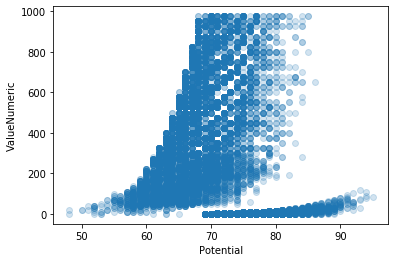

In [51]:
# Your code here:
import matplotlib.pyplot as plt

plt.scatter(fifa['Potential'], fifa['ValueNumeric'], alpha=0.2)
plt.xlabel('Potential')
plt.ylabel('ValueNumeric')

No se aprecia una relación lineal (recta). Si acaso, una relación exponencial.